In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('skroutz_aggregate.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,1,amd ryzen 5 1600 box epexergastis me wraith sp...,1030,1,AMD Ryzen 5 1600 Box,696,CPUs
1,2,amd ryzen 5 1600,3964,1,AMD Ryzen 5 1600 Box,696,CPUs
2,3,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,4814,1,AMD Ryzen 5 1600 Box,696,CPUs
3,4,amd ryzen 5 1600 yd1600bbaebox,4835,1,AMD Ryzen 5 1600 Box,696,CPUs
4,5,amd ryzen 5 1600 box yd1600bbaebox,2976,1,AMD Ryzen 5 1600 Box,696,CPUs


In [20]:
data[1].value_counts()

oozoo timepieces brown leather strap                        55
tom carter cruise                                           53
casio collection stainless steel bracelet                   41
casio collection                                            39
casio collection black rubber strap                         33
                                                            ..
visetti pe 685sb respect silver stainless steel bracelet     1
visetti respect silver stainless steel bracelet              1
visetti respect multifunction pe 685sb                       1
loisir serenata gold mesh band bracelet 11l05 00362          1
bataria super b sb12v25p sc technologias lithiou             1
Name: 1, Length: 186850, dtype: int64

In [21]:
data[4].value_counts()

Mitsubishi MSZ/MUZ-HJ25VA                             100
Inventor Omnia Eco O3MVI32-09WiFiR / O3MVO32-09        98
Gree Bora GRS-121 EI/JBR1-N3                           96
Inventor Omnia Eco O3MVI32-12WiFiR / O3MVO32-12        95
Gree Bora GRS-181 EI/JBR1-N3                           95
                                                     ... 
Emporio Armani AR1618                                   1
Seiko Quartz Stainless Steel Bracelet SSB145P1          1
Guess Zoom Mens Watch W13571G2                          1
Guess Rose Gold Chrono Brown Leather Strap W0380G4      1
Super B Lithium Ion SB12V25P-SC 130Ah                   1
Name: 4, Length: 62480, dtype: int64

In [4]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [5]:
data.drop([6], axis = 1, inplace = True)
data.head()

,0,1,2,3,4,5
0,1,amd ryzen 5 1600 box epexergastis me wraith sp...,1030,1,AMD Ryzen 5 1600 Box,696
1,2,amd ryzen 5 1600,3964,1,AMD Ryzen 5 1600 Box,696
2,3,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,4814,1,AMD Ryzen 5 1600 Box,696
3,4,amd ryzen 5 1600 yd1600bbaebox,4835,1,AMD Ryzen 5 1600 Box,696
4,5,amd ryzen 5 1600 box yd1600bbaebox,2976,1,AMD Ryzen 5 1600 Box,696


In [6]:
data[1].value_counts()

oozoo timepieces brown leather strap                        55
tom carter cruise                                           53
casio collection stainless steel bracelet                   41
casio collection                                            39
casio collection black rubber strap                         33
                                                            ..
visetti pe 685sb respect silver stainless steel bracelet     1
visetti respect silver stainless steel bracelet              1
visetti respect multifunction pe 685sb                       1
loisir serenata gold mesh band bracelet 11l05 00362          1
bataria super b sb12v25p sc technologias lithiou             1
Name: 1, Length: 186850, dtype: int64

In [7]:
dataWithoutLabels = data.drop([1], axis = 1)
dataWithoutLabels.head()

,0,2,3,4,5
0,1,1030,1,AMD Ryzen 5 1600 Box,696
1,2,3964,1,AMD Ryzen 5 1600 Box,696
2,3,4814,1,AMD Ryzen 5 1600 Box,696
3,4,4835,1,AMD Ryzen 5 1600 Box,696
4,5,2976,1,AMD Ryzen 5 1600 Box,696


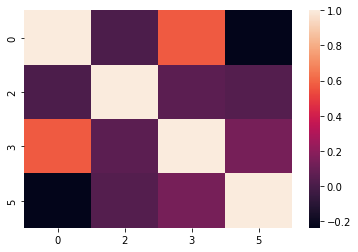

In [8]:
import seaborn as sns
sns.heatmap(data.corr());


In [9]:
for i in dataWithoutLabels.columns:
    if dataWithoutLabels[i].dtype=='object':
        dataWithoutLabels[i]=dataWithoutLabels[i].astype('category')
        dataWithoutLabels[i]=dataWithoutLabels[i].cat.codes

In [10]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238170 entries, 0 to 238169
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       238170 non-null  int64
 1   2       238170 non-null  int64
 2   3       238170 non-null  int64
 3   4       238170 non-null  int32
 4   5       238170 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 8.2 MB


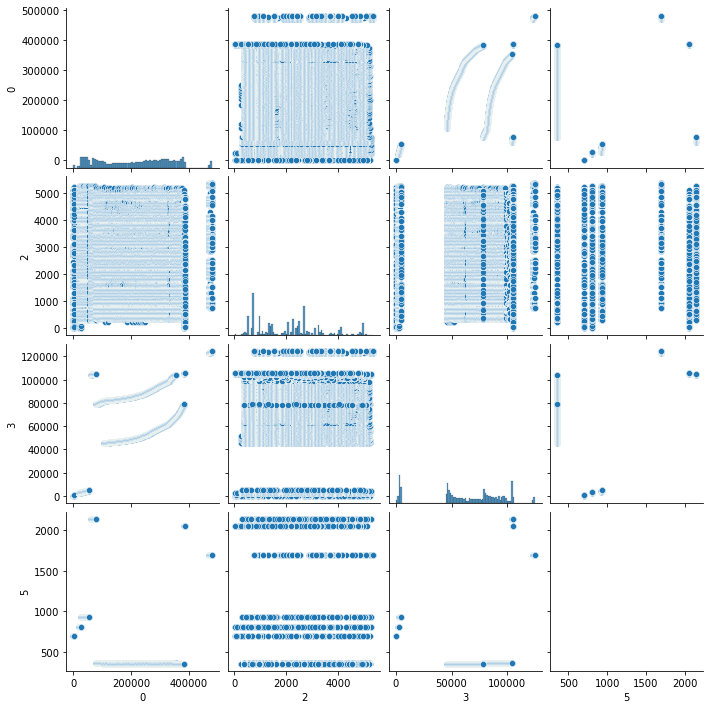

In [11]:
import seaborn as sns

sns.pairplot(data)
plt.show()

In [17]:
scaler= StandardScaler()
x = scaler.fit_transform(dataWithoutLabels.iloc[:10000,:])

2
3
4
5


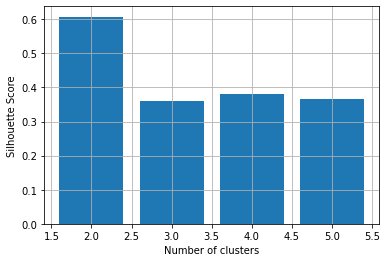

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = [] 

for n_cluster in range(2,6):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x))) 
    print(n_cluster)
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4,5] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

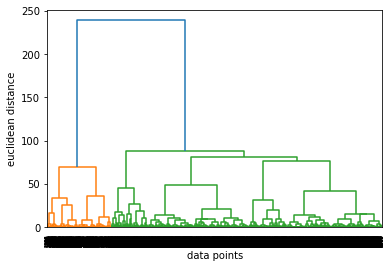

In [19]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(x, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()